# TP2 - Régression linéaire multiple

In [1]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st
from mpl_toolkits.mplot3d import Axes3D

## Exercice 1 - Concentration en Ozone

Cet exercice a pour objectif d'expliquer la concentration de l'air en ozone ($O_{3}$) en fonction de 2 paramètres: la température observée à $12$h et le vent.
Nous étudierons les limites des modèles de régression en présence de plus d'une variable explicative pour construire notre modèle.

In [2]:
Oz=pd.read_csv("ozone.txt",sep=';')

**Visualisation des données:**

In [3]:
Oz.head()

,Date,O3,T12,T15,Ne12,N12,S12,E12,W12,Vx,O3v,nebulosite,vent
0,19960422,63.6,13.4,15.0,7,0,0,3,0,9.35,95.6,NUAGE,EST
1,19960429,89.6,15.0,15.7,4,3,0,0,0,5.40,100.2,SOLEIL,NORD
2,19960506,79.0,7.9,10.1,8,0,0,7,0,19.30,105.6,NUAGE,EST
3,19960514,81.2,13.1,11.7,7,7,0,0,0,12.60,95.2,NUAGE,NORD
4,19960521,88.0,14.1,16.0,6,0,0,0,6,-20.30,82.8,NUAGE,OUEST


In [4]:
Oz.describe()

,Date,O3,T12,T15,Ne12,N12,S12,E12,W12,Vx,O3v
count,5.000000e+01,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.00000,50.000000
mean,1.996849e+07,86.300000,20.320000,21.390000,5.020000,0.940000,0.580000,1.360000,1.540000,-0.83120,84.280000
std,8.127568e+03,23.900824,4.674638,4.980544,2.535382,2.122859,1.499524,2.229304,2.451239,13.59233,24.953868
min,1.996042e+07,41.800000,7.900000,10.100000,0.000000,0.000000,0.000000,0.000000,0.000000,-27.06000,38.000000
25%,1.996072e+07,66.600000,17.400000,18.150000,3.000000,0.000000,0.000000,0.000000,0.000000,-10.80000,63.400000
50%,1.997043e+07,83.900000,19.750000,21.050000,6.000000,0.000000,0.000000,0.000000,0.000000,-3.25500,83.400000
75%,1.997092e+07,102.200000,24.325000,25.700000,7.000000,0.000000,0.000000,3.000000,2.750000,9.35000,102.750000
max,1.998072e+07,139.000000,29.500000,30.600000,8.000000,7.000000,6.000000,8.000000,8.000000,28.36000,142.800000


**Représentation graphique des données du dataset:**

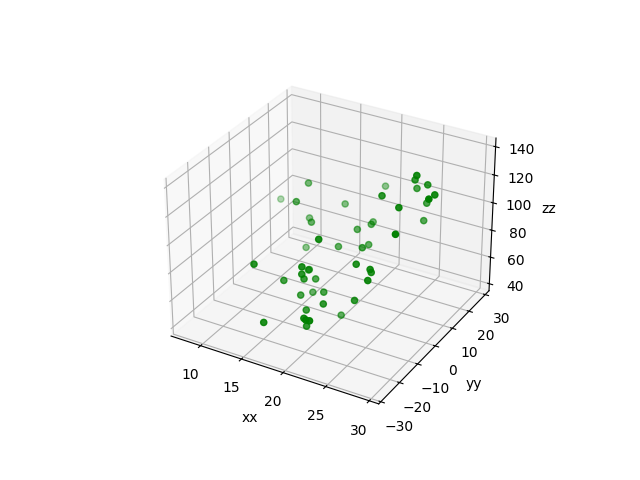

In [5]:
%matplotlib widget

# Création de points en 3D
T12 = Oz['T12']
Vx = Oz['Vx']
O3 = Oz['O3']

fig=plt.figure()
xx, yy=np.meshgrid(np.linspace(min(T12),max(T12),50),np.linspace(min(Vx),max(Vx),50))
# Ajout des axes
ax = fig.add_subplot(111, projection='3d')

# Affichage des points
ax.scatter(T12,Vx,O3, color='green')

# Définition des labels
ax.set_xlabel("xx")
ax.set_ylabel("yy")
ax.set_zlabel("zz")

# Affichage du graphique
plt.show()

**Modélisation:**

In [6]:
X=Oz[['T12','Vx']]
X=sm.add_constant(X)
Y=O3

In [7]:
model=sm.OLS(Y,X)
resultats=model.fit()
print(resultats.summary())

                            OLS Regression Results                            
Dep. Variable:                     O3   R-squared:                       0.525
Model:                            OLS   Adj. R-squared:                  0.505
Method:                 Least Squares   F-statistic:                     25.96
Date:                Thu, 02 Oct 2025   Prob (F-statistic):           2.54e-08
Time:                        14:10:43   Log-Likelihood:                -210.53
No. Observations:                  50   AIC:                             427.1
Df Residuals:                      47   BIC:                             432.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         35.4530     10.745      3.300      0.0

Il est ici intéressant de noter que notre modèle, dont l'étude dépend de 2 variables explicatives, possède un score $R^{2}$ relativement faible: seulement $0.525$. Le coefficient de corrélation ajusté ne fait pas mieux, on a au contraire un score plus faible! On peut imaginer qu'il est plus difficile de trouver une vraie corrélation entre au moins 3 paramètres d'un jeu de données plutôt que 2.
Remarquons une *std-error* de presque $11$, soit près d'un tiers du coefficient $\beta_{1}$ estimé. Cette erreur est assez importante.

Néanmoins, on note un score de *Log-likelihood* relativement bas, comparativement aux données traitées durant le TP1, de même pour les coefficients AIC et BIC. Le modèle pourrait alors sembler robuste à première vue. 

Mais ces résultats obtenus semblent contradictoires: comment peut-on avoir un bon score de *Log-likelihood* avec un coefficient de corrélation aussi mauvais? On peut supposer qu'il faut prendre en compte d'autres paramètres, pas forcément visibles sur le résumé donné par ***summary()***, pôur réellement juger de la qualité d'un modèle.

**Vérification des résultats obtenus:** 

In [17]:
n=len(Y)

#Calculs "à la main" des estimateurs

#Calcul du vecteur Beta des estimateurs 
ebeta=np.array((np.linalg.inv(X.T@X))@X.T@Y)
p=len(ebeta)
print("Estimateur Beta:",ebeta)

#Calcul de l'erreur quadratique
SCR=SCR = np.sum((Y-X@ebeta)**2)
print('Erreur résidus:',SCR)

#Calcul de l'estimateur de l'écart-type
esigma=np.sqrt((SCR/(n-p)))
print("Estimation de la variance de l'erreur:",esigma)

Estimateur Beta: [35.45300611  2.53804655  0.87357079]
Erreur résidus: 13299.398524312328
Estimation de la variance de l'erreur: 16.821591067708145


In [9]:
sigma=np.sqrt(resultats.scale)
print('Estimation depuis les résultats du modèle:',sigma)

Estimation depuis les résultats du modèle: 16.821591067708145


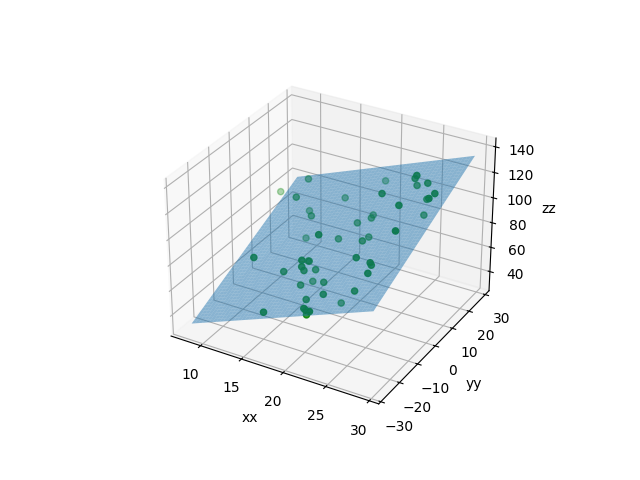

In [10]:
fig1=plt.figure()
xx, yy=np.meshgrid(np.linspace(min(T12),max(T12),50),np.linspace(min(Vx),max(Vx),50))
z=ebeta[0]+ebeta[1]*xx+ebeta[2]*yy
# Ajout des axes
ax = fig1.add_subplot(111, projection='3d')

# Affichage des points
ax.scatter(T12,Vx,O3, color='green')

#Affichage du plan
ax.plot_surface(xx, yy, z, alpha=0.5)

# Définition des labels
ax.set_xlabel("xx")
ax.set_ylabel("yy")
ax.set_zlabel("zz")

# Affichage du graphique
plt.show()

## Exercice 2 - Retour sur la hauteur des eucalyptus

Nous reprenons ici le dataset étudié lors du TP1 sur les eucalyptus et appliquons une régression multiple basée sur une combinaison des 2 régressions linéaires simples modélisées. Nous pourrons expérimenter ce qui se produit lorsque 2 estimateurs utilisés pour un modèle de régression sont très corrélés.

In [11]:
Euca=pd.read_csv("eucalyptus.txt",sep=';')

**Visualisation des données:**

In [12]:
Euca.head()

,numero,ht,circ,bloc,clone
0,1,18.25,36,1,L2-123
1,2,19.75,42,1,L2-123
2,3,16.50,33,1,L2-123
3,4,18.25,39,1,L2-123
4,5,19.50,43,1,L2-123


**Modélisation:**

In [13]:
circ=Euca['circ']
rcirc=np.sqrt(circ)
Euca['rcirc']=rcirc
ht=Euca['ht']
N=len(ht)

In [14]:
Euca.head()

,numero,ht,circ,bloc,clone,rcirc
0,1,18.25,36,1,L2-123,6.000000
1,2,19.75,42,1,L2-123,6.480741
2,3,16.50,33,1,L2-123,5.744563
3,4,18.25,39,1,L2-123,6.244998
4,5,19.50,43,1,L2-123,6.557439


In [15]:
A=Euca[['circ','rcirc']]
A=sm.add_constant(A)
model2=sm.OLS(ht,A)
resultats2=model2.fit()
print(resultats2.summary())

                            OLS Regression Results                            
Dep. Variable:                     ht   R-squared:                       0.792
Model:                            OLS   Adj. R-squared:                  0.792
Method:                 Least Squares   F-statistic:                     2718.
Date:                Thu, 02 Oct 2025   Prob (F-statistic):               0.00
Time:                        14:10:43   Log-Likelihood:                -2208.5
No. Observations:                1429   AIC:                             4423.
Df Residuals:                    1426   BIC:                             4439.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -24.3520      2.614     -9.314      0.0

Remarquons dans un premier temps que le score $R^{2}$ obtenu ici est à peine plus élevé que celui obtenu uniquement avec $\sqrt{circ}$ (seulement une différence de $0.1$). Le $R^{2}$ ajusté reste identique. Ayant toujours $p=2$ variables explicatives et $p<<n=1429$, on retrouve le même phénomène que dans les 2 études du TP1.

Nous pouvons néanmoins noter une petite curiosité par rapport aux 2 régressions linéaires simples obtenues : l'estimation du coefficient $circ$ est **négative**! Cela paraît complètement contre-intuitif au départ, puisque la circonférence d'un eucalyptus ne peut pas être négative. Cela s'explique par nos 2 variables explicatives choisies pour notre modèle, $circ$ et $\sqrt{circ}$. La 2ème est obtenue à partir d'une transformation de la première, on applique à $circ$ la fonction $\sqrt{.}$. Ces deux variables explicatives sont donc fortement corrélées. Cela se confirme avec la donnée **Cond. No.** obtenue dans le résumé des résultats: elle est de $4.41\times 10^{3}$ contrairement aux 2 autres modèles $circ$ et $\sqrt{circ}$, avec des scores respectifs de $273$ et $76.7$. La note **[2]** en annexe du tableau récapitulatif signale également ce problème.

Le modèle semble à priori légèrement plus adapté que les 2 précédents étudiés dans le TP1, mais la redondance des données considérées avec les 2 variables explicatives rend l'interprétation des résultats plus délicate.

**Visualisation des résultats:**

[-24.35200327  -0.48294547   9.98688814]


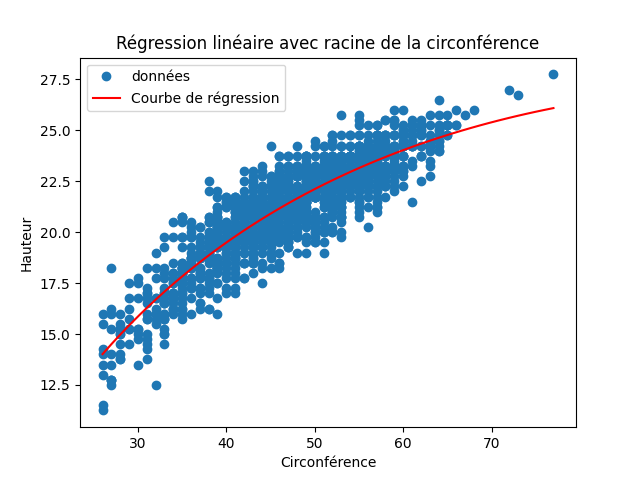

In [16]:
#Construction de la courbe de régression

fig2 = plt.figure()
absc_Circ = np.linspace(np.min(circ), np.max(circ))
Ebeta=np.array((np.linalg.inv(A.T@A))@A.T@ht)
d=Ebeta[0]+Ebeta[1]*absc_Circ+Ebeta[2]*np.sqrt(absc_Circ)
print(Ebeta)

plt.plot(circ, ht, 'o', label='données')
plt.plot(absc_Circ, d, color='red', label='Courbe de régression')
plt.xlabel('Circonférence')
plt.ylabel('Hauteur')
plt.title("Régression linéaire avec racine de la circonférence")
plt.legend()
plt.show()

Malgré les problèmes soulevés par la forte corrélation entre les 2 variables explicatives dans l'interprétation du tableau **summary()**, la courbe de régression obtenue modélise efficacement la relation entre la hauteur et la circonférence de l’arbre. L’ajout de la racine carrée de la circonférence comme variable explicative permet de mieux mettre en évidence la croissance non linéaire de la hauteur avec la circonférence. Cela rend notre modèle un petit peu moins sensible à de potentielles valeurs extrêmes, qui auraient eu un impact plus significatif sur une simple régression linéaire simple. 